Tugas untuk unsupervised learning adalah memprediksi apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak berdasarkan data pelanggan di dealer.



In [1]:
#Import Library
import numpy as np
import random as rd
import pandas as pd
import math 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#Import Dataset
df_train = pd.read_csv('kendaraan_train.csv')

In [3]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


## Preprocessing

In [4]:
#Cek apakah ada nilai NULL / NaN
df_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [5]:
#Mengisi Nilai Kosong

#Fitur Kategorikal
df_train['Umur_Kendaraan'].fillna(df_train['Umur_Kendaraan'].mode().iloc[0], inplace=True)
df_train['Jenis_Kelamin'].fillna(df_train['Jenis_Kelamin'].mode().iloc[0], inplace=True)
df_train['SIM'].fillna(df_train['SIM'].mode().iloc[0], inplace=True)
df_train['Kode_Daerah'].fillna(df_train['Kode_Daerah'].mode().iloc[0], inplace=True)
df_train['Sudah_Asuransi'].fillna(df_train['Sudah_Asuransi'].mode().iloc[0], inplace=True)
df_train['Kendaraan_Rusak'].fillna(df_train['Kendaraan_Rusak'].mode().iloc[0], inplace=True)
df_train['Kanal_Penjualan'].fillna(df_train['Kanal_Penjualan'].mode().iloc[0], inplace=True)

#Fitur Kontinu
df_train['Umur'].fillna(df_train['Umur'].mean(), inplace=True)
df_train['Premi'].fillna(df_train['Premi'].mean(), inplace=True)
df_train['Lama_Berlangganan'].fillna(df_train['Lama_Berlangganan'].mean(), inplace=True)

In [6]:
df_train.isnull().sum()

id                   0
Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [7]:
#Transformasi FItur Kategorikal yang tidak berupa angka
ubah = {
    '< 1 Tahun':0,
    '1-2 Tahun':1,
    '> 2 Tahun':2,
    'Pernah':1,
    'Tidak':0,
    'Pria':1,
    'Wanita':0
}
df_train = df_train.replace(ubah)

In [8]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,0,30.0,1.0,33.0,1.0,0,0,28029.0,152.0,97.0,0
1,2,1,48.0,1.0,39.0,0.0,2,1,25800.0,29.0,158.0,0
2,3,1,21.0,1.0,46.0,1.0,0,0,32733.0,160.0,119.0,0
3,4,0,58.0,1.0,48.0,0.0,1,0,2630.0,124.0,63.0,0
4,5,1,50.0,1.0,35.0,0.0,2,1,34857.0,88.0,194.0,0


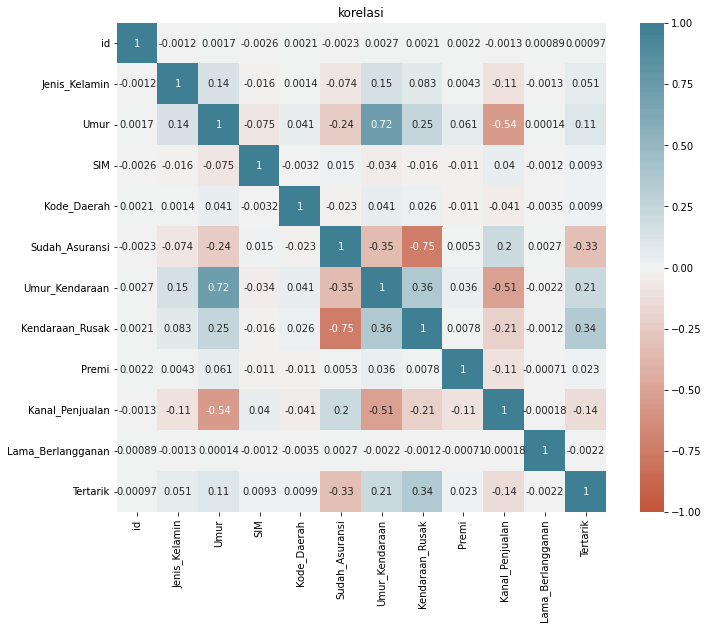

In [9]:
#Pengercekan Korelasi pada dataset
plt.figure(figsize=(12, 9))
plt.title("korelasi")
heat_i = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot =True)
plt.show()

In [10]:
#Scaling menggunakan MinMaxScaler
scaler = MinMaxScaler()
df_train = df_train.copy()
df_train[
    ['id',	'Jenis_Kelamin',	'Umur',	'SIM',	'Kode_Daerah',	'Sudah_Asuransi',	'Umur_Kendaraan',	'Kendaraan_Rusak',	'Premi',	'Kanal_Penjualan',	'Lama_Berlangganan',	'Tertarik']
] = scaler.fit_transform(df_train[
    ['id',	'Jenis_Kelamin',	'Umur',	'SIM',	'Kode_Daerah',	'Sudah_Asuransi',	'Umur_Kendaraan',	'Kendaraan_Rusak',	'Premi',	'Kanal_Penjualan',	'Lama_Berlangganan',	'Tertarik']                      
])
df_train = df_train

In [11]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,0.000000,0.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,0.000003,1.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,0.000007,1.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.056002,0.981481,0.377163,0.0
3,0.000010,0.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
4,0.000014,1.0,0.461538,1.0,0.673077,0.0,1.0,1.0,0.059953,0.537037,0.636678,0.0


In [12]:
#membuat PCA 2 fitur
pca = PCA(2) 
df_train = pca.fit_transform(df_train)
df_train

array([[-0.94354968,  0.44414688],
       [ 0.884987  , -0.41667245],
       [-0.81606549, -0.50687858],
       ...,
       [-0.95288633,  0.45413504],
       [-0.58479992, -0.62535081],
       [ 0.77533766, -0.37265742]])

##PEMODELAN CLUSTERING

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize 
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

### Eksperimen 1

In [14]:
kmeans = KMeans(K=2)

In [15]:
kmeans.predict(df_train)

array([0., 1., 0., ..., 0., 0., 1.])

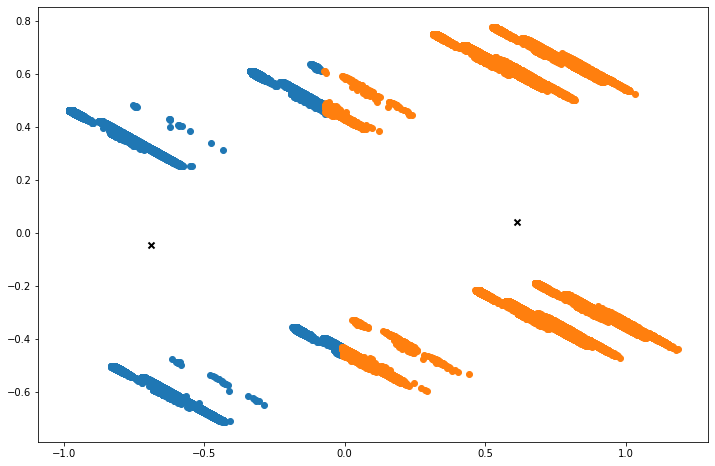

In [16]:
kmeans.plot()

### Eksperimen 2

[2. 0. 3. ... 2. 3. 0.]


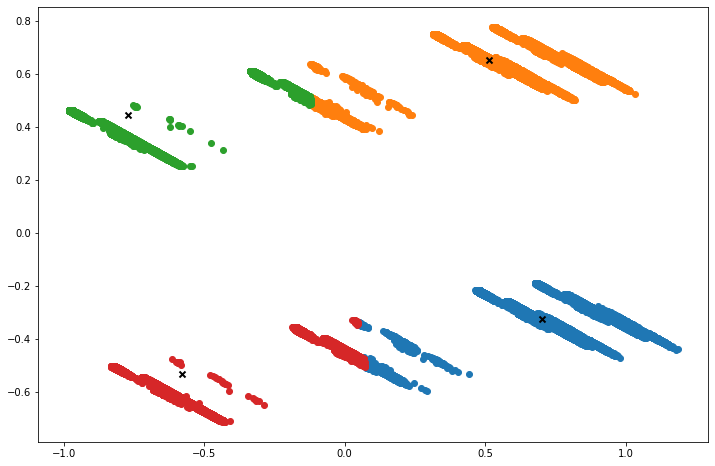

In [17]:
kmeans = KMeans(K=4)
print(kmeans.predict(df_train))
kmeans.plot()

### Eksperimen 3

[2. 4. 1. ... 2. 1. 4.]


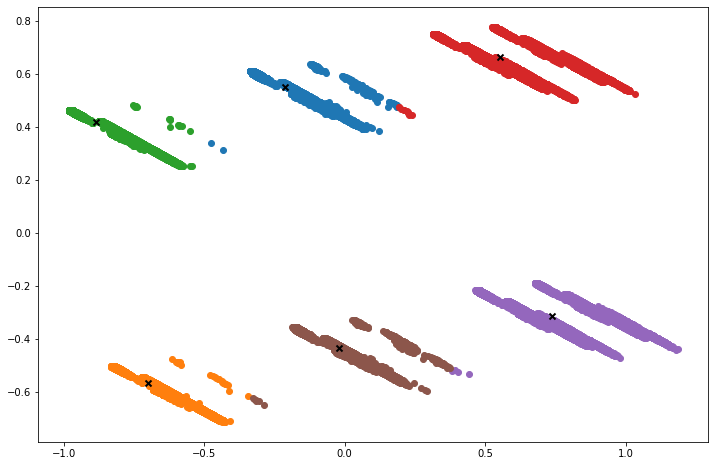

In [18]:
kmeans = KMeans(K=6)
print(kmeans.predict(df_train))
kmeans.plot()

In [19]:
# transform to dataframe
df = pd.DataFrame(df_train)
df.columns = ["var1", "var2"]
df["cluster"] = kmeans.predict(df_train).astype('int64')
colors = sns.color_palette()[0:3]
df = df.sort_values("cluster")

# define rename schema
mynames = {"0": "right", "1": "Center", "2": "left"}
# df["cluster_name"] = [mynames[i] for i in df.cluster]

# save dataframe as CSV
df.to_csv("newdataset.csv")